In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [64]:
multivariate_data=test_new.loc[500:24000,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]

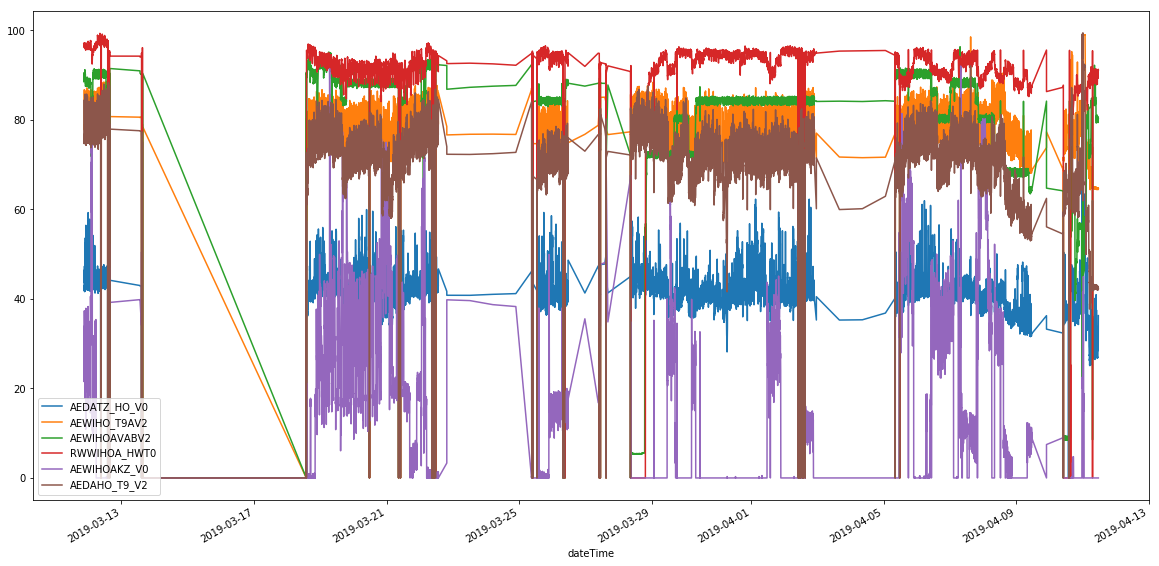

In [65]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [66]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (23501, 6)
shape of multivariate_data_drop_zero:  (12219, 6)


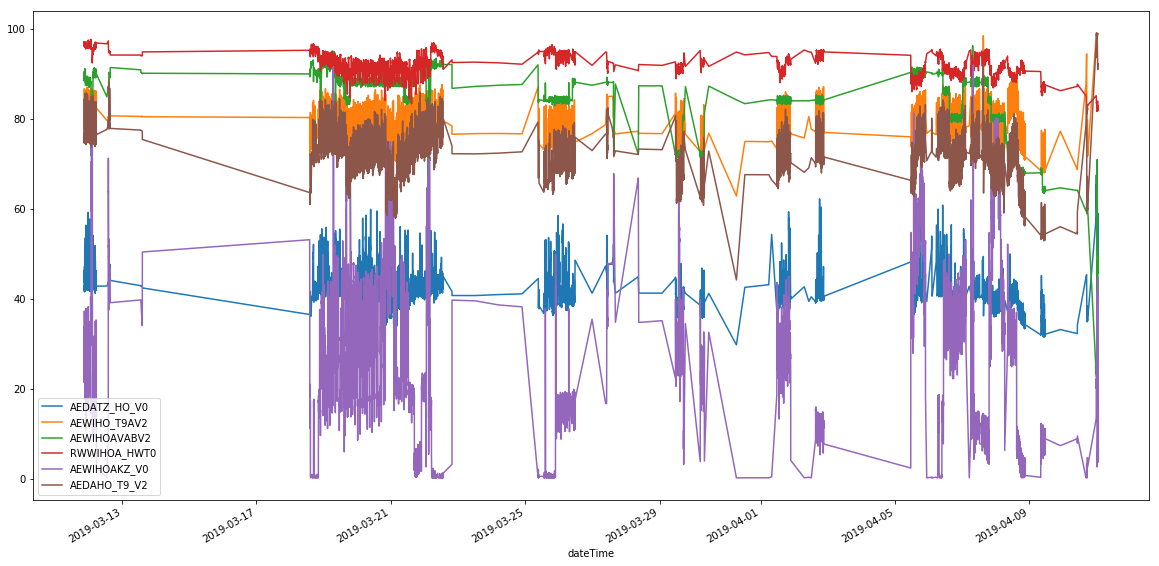

In [67]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [68]:
print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)

multivariate_data_drop_zero head: 
                      AEDATZ_HO_V0  AEWIHO_T9AV2  AEWIHOAVABV2  RWWIHOA_HWT0  \
dateTime                                                                      
2019-03-11 20:46:00     42.840270     78.207814     89.340908     97.117826   
2019-03-11 20:47:00     42.755927     78.265069     89.482635     97.134037   
2019-03-11 20:48:00     42.645695     78.629042     89.533737     96.987372   
2019-03-11 20:49:00     42.266673     78.798289     89.456286     96.967114   
2019-03-11 20:50:00     42.081100     78.762426     89.420355     96.985749   

                     AEWIHOAKZ_V0  AEDAHO_T9_V2  
dateTime                                         
2019-03-11 20:46:00     32.934253     76.566532  
2019-03-11 20:47:00     31.895008     76.470365  
2019-03-11 20:48:00     31.816099     76.340820  
2019-03-11 20:49:00     31.855643     75.814803  
2019-03-11 20:50:00     32.255737     75.177724  


In [69]:
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)

# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  9775
dataset length:  12219
train_input shape:  (9775, 5)
train_output shape:  (9775,)
test_input shape:  (2444, 5)
test_output shape:  (2444,)


# Linear Regression

In [70]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [71]:
train_model=LinearRegression(fit_intercept=False,normalize=True).fit(train_input,train_output)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


In [60]:
predicted_output=train_model.predict(test_input)

300
60
size of actual op:  60
size of predicted op:  60


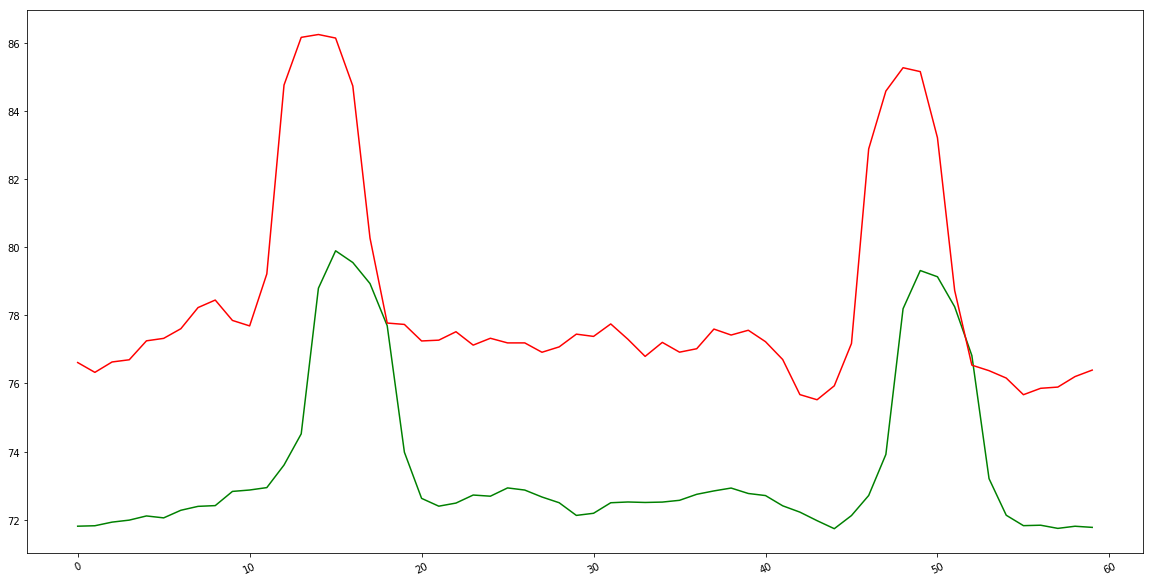

Slope: [ 0.33855502  0.74326387  0.10369724 -0.10056331 -0.01400857]
Intercept: 0.0
r_2 statistic: -2.06
Mean_absolute_error: 4.90
Mean squared error: 28.33
RMSE:  5.323054764375798


In [74]:
# new dataset
new_data=test_new.loc[24001:24060,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
new_data = new_data.set_index('dateTime')
new_data= new_data.loc[::-1]

new_data= new_data.replace(0,nan)
new_data= new_data.dropna(how='any',axis=0)

new_data_array=np.array(new_data)

new_train=new_data_array[:,0:-1]
new_test=new_data_array[:,-1]
print(new_train.size)
print(new_test.size)

new_pred_output=train_model.predict(new_train)

print('size of actual op: ',new_test.size)
print('size of predicted op: ',new_pred_output.size)
plt.plot(new_pred_output,color='green')
plt.plot(new_test,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(new_test,new_pred_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(new_test,new_pred_output))
print("Mean squared error: %.2f" % mean_squared_error(new_test,new_pred_output))
RMSE=math.sqrt(mean_squared_error(new_test,new_pred_output))
print('RMSE: ',RMSE)

In [61]:
print(predicted_output)

[68.36738026 68.39295338 68.67652595 ... 85.76616442 85.81607562
 85.7747165 ]


size of actual op:  2643
size of predicted op:  2643


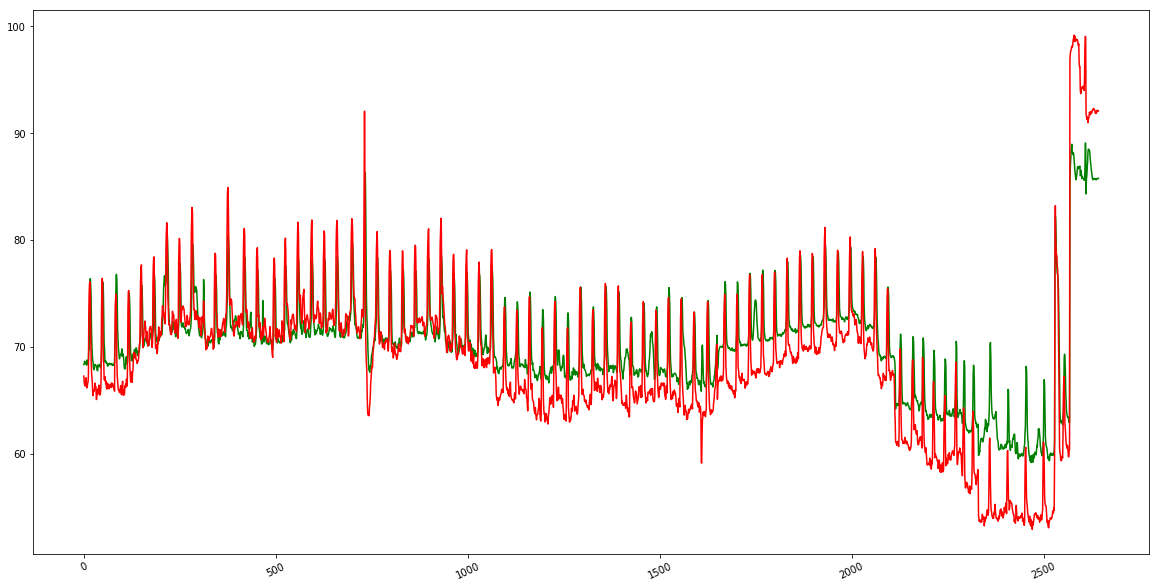

In [62]:
print('size of actual op: ',test_output.size)
print('size of predicted op: ',predicted_output.size)
plt.plot(predicted_output,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Slope: [ 0.32933639  0.70271207  0.1027762  -0.06517082  0.00712462]
Intercept: 0.0
r_2 statistic: 0.76
Mean_absolute_error: 2.90
Mean squared error: 13.66
RMSE:  3.6960173367287794


# Support Vector Machine

In [40]:
import seaborn as sn
from sklearn import svm
# from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.svm import SVR

In [48]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_input, train_output, test_size=0.2)

clf= SVR(kernel='rbf', C=10, gamma='auto', degree=3, epsilon=.1,coef0=1)

clf.fit(train_input,train_output)

SVR(C=10, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
predicted_output_SVM=clf.predict(test_input)

In [50]:
print(predicted_output_SVM)

[66.78762729 66.51622896 65.60301272 ... 72.65022303 72.65022303
 72.65022303]


size of actual op:  (2643,)
size of predicted op:  (2643,)


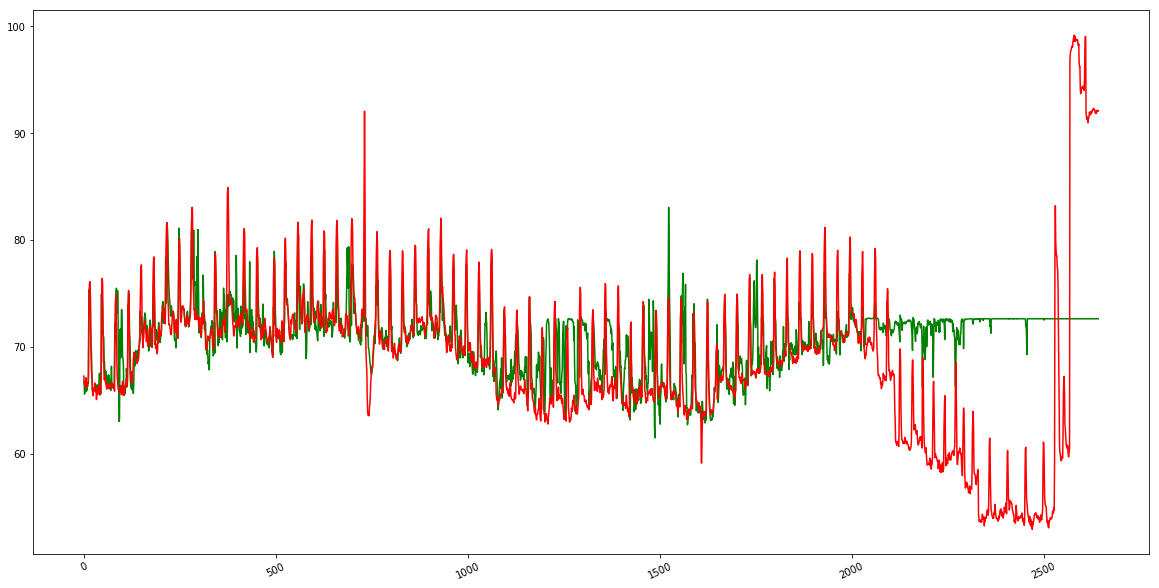

In [51]:
print('size of actual op: ',test_output.shape)
print('size of predicted op: ',predicted_output_SVM.shape)
plt.plot(predicted_output_SVM,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_input, train_output, cv=5)
print(scores)

[-1.10504956  0.33496192  0.14078131  0.41849854  0.36611393]


In [47]:
confidence = clf.score(test_input,test_output)
print('confidence: ',confidence)
print('score: ',clf.score(test_input,test_output))
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(test_output,predicted_output_SVM))

confidence:  -0.036166963005270336
score:  -0.036166963005270336
r2_score:  -0.036166963005270336
